In [56]:

import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [57]:
#load data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()  #for checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [58]:
df.shape  #for shape 

(9240, 37)

In [59]:
df.describe()  #for  statistic information of data

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [60]:
df = df.replace('select',0)  #replace select there are some column which has select keyword means there is no option selected 

In [61]:
# remove null values column which contain null values count more
df2 = df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,No,No,No,Modified


In [9]:
df2['Specialization'] = df2['Specialization'].fillna('absent value') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('absent value')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [62]:

# id is not needed
df_final = df2.drop('Prospect ID',1)

In [63]:
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


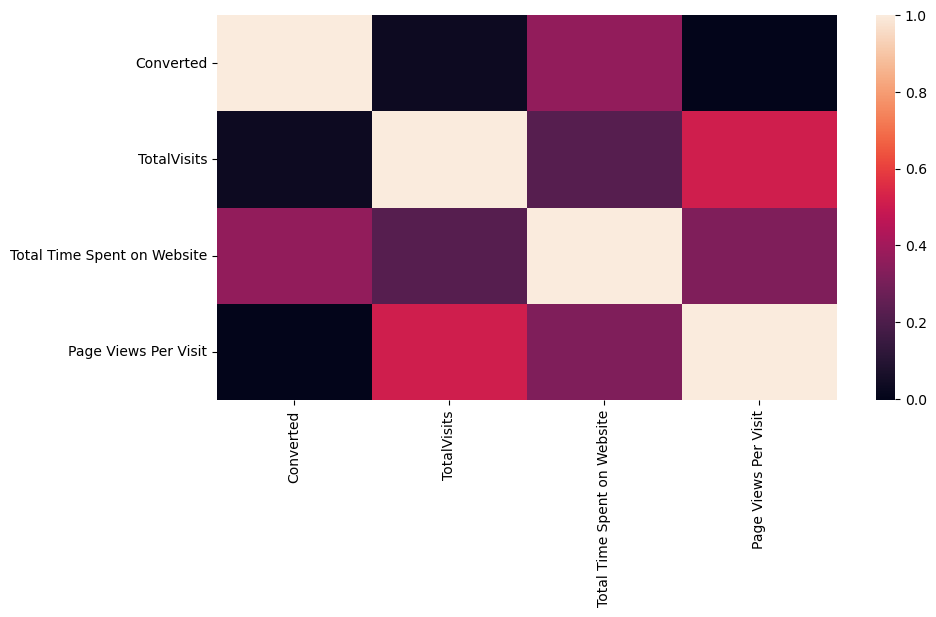

In [64]:
# To check relation between variables
plt.figure(figsize=(10,5))
sns.heatmap(df_final.corr())
plt.show()

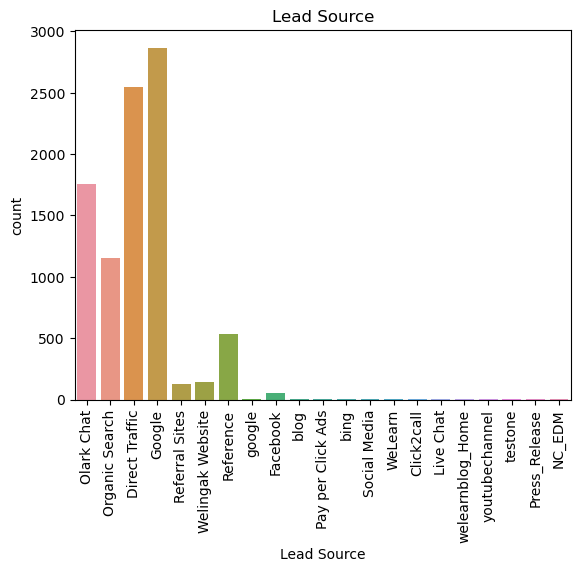

In [65]:
#as we can see google source is highest resource to attract the education company 
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')  
plt.show()

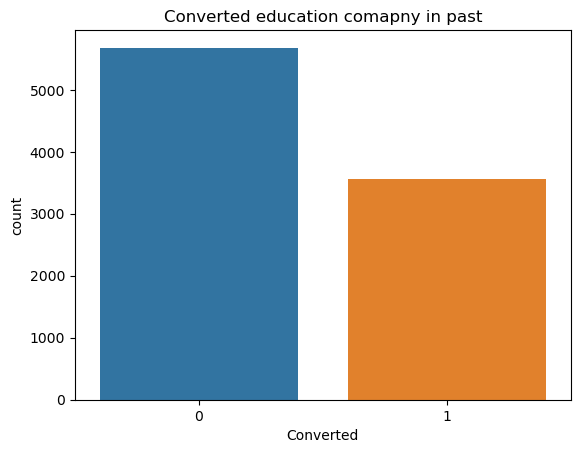

In [66]:
#as per data there were more number of non-converted 
sns.countplot(df['Converted'])
plt.title('Converted education comapny in past')
plt.show()

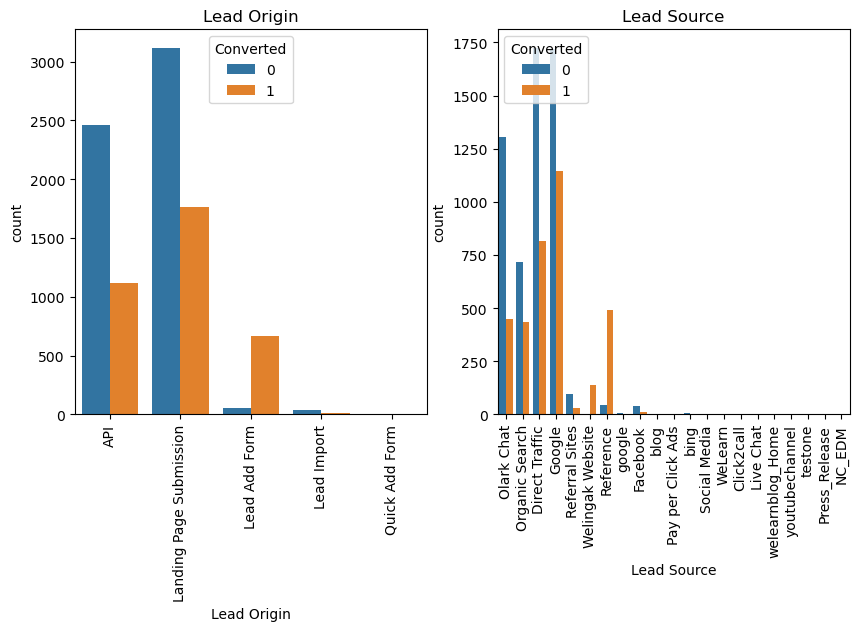

In [67]:
#compare between relational varaibles
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

In [69]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0


In [70]:
df_final_dum = df_final_dum.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity','Last Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
# train and test split using sklearn librarry

# Import the required library
from sklearn.model_selection import train_test_split

In [103]:
df_final_dum = df_final_dum.replace(np.nan,0)
X = df_final_dum.drop(['Converted'], 1)
X.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [105]:
# Split thedata into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [108]:
#scalable reason (to make every column data in same scale)
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked


In [109]:

logreg = LogisticRegression()

In [110]:
from sklearn.feature_selection import RFE


In [111]:
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [112]:
#refe selected feature automated
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 29),
 ('Lead Origin_Quick Add Form', False, 41),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False, 12),
 ('Specialization_Finance Management', False, 11),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 28),
 ('Specialization_Human Resource Management', False, 9),
 ('Specialization_IT Projects Management', False, 8),
 ('Specialization_International Business', False, 23),
 ('Specialization_Marketing Management', False, 7),
 ('Specialization_Media and Advertising', False, 24),
 ('Specialization_Operations Management', False, 10),
 ('Specialization_Retail Management', False, 40),
 ('Specialization_Rural and Agribusiness',

In [113]:
col = X_train.columns[rfe.support_]

In [114]:
import statsmodels.api as sm

In [115]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6390
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Feb 2024   Deviance:                   1.8255e+05
Time:                        00:10:51   Pearson chi2:                 8.93e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -9.988e+14   3.55e+07  -2.81e+07      0.000   -9.99e+14   -9.99e+14
TotalVisits                                           2.656e+15   4.97e+07   5.35e+07      0.000    2.66e+15    2.66e+15
Total Time Spent on Website                           2.115e+15      4e+06   5.28e+08      0.000    2.11e+15    2.11e+15
Page Views Per Visit                                 -9.777e+14   1.45e+07  -6.75e+07      0.000   -9.78e+14   -9.78e+14
Lead Origin_Landing Page Submission                   -2.95e+14   3.16e+06  -9.33e+07      0.000   -2.95e+14   -2.95e+14
Lead Origin_Lead Add Form                            -1.487e+14   3.64e+07  -4.09e+06      0.000   -1.49e+14   -1.49e+14
Lead Origin_Lead Import                               1.091e+15   5.15e+07   2.12e+07      0.000    1.09e+15    1.09e+15
Lead Origin_Quick Add Form                              16.2371   1.65e-07   9.82e+07      0.000      16.237      16.237
Specialization_Business Administration                2.296e+13   5.02e+06   4.58e+06      0.000     2.3e+13     2.3e+13
Specialization_E-Business                            -5.695e+13    1.2e+07  -4.76e+06      0.000    -5.7e+13    -5.7e+13
Specialization_E-COMMERCE                             1.176e+14   8.11e+06   1.45e+07      0.000    1.18e+14    1.18e+14
Specialization_Finance Management                     1.806e+14      4e+06   4.51e+07      0.000    1.81e+14    1.81e+14
Specialization_Healthcare Management                  1.957e+14   7.19e+06   2.72e+07      0.000    1.96e+14    1.96e+14
Specialization_Hospitality Management                -2.212e+14   8.19e+06   -2.7e+07      0.000   -2.21e+14   -2.21e+14
Specialization_Human Resource Management              2.461e+14   4.05e+06   6.08e+07      0.000    2.46e+14    2.46e+14
Specialization_IT Projects Management                 2.695e+14   5.33e+06   5.06e+07      0.000     2.7e+14     2.7e+14
Specialization_International Business                -7.318e+13   6.65e+06   -1.1e+07      0.000   -7.32e+13   -7.32e+13
Specialization_Marketing Management                   2.527e+14   4.05e+06   6.24e+07      0.000    2.53e+14    2.53e+14
Specialization_Media and Advertising                 -8.501e+13   6.35e+06  -1.34e+07      0.000    -8.5e+13    -8.5e+13
Specialization_Operations Management                   1.83e+14   4.72e+06   3.88e+07      0.000    1.83e+14    1.83e+14
Specialization_Retail Management                      -2.32e+14   8.57e+06  -2.71e+07      0.000   -2.32e+14   -2.32e+14
Specialization_Rural and Agribusiness                 3.104e+12   9.58e+06   3.24e+05      0.000     3.1e+12     3.1e+12
Specialization_Select                                -2.10

In [120]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
56,Last Activity_Resubscribed to emails,inf
70,Last Notable Activity_Email Marked Spam,inf
78,Last Notable Activity_Resubscribed to emails,inf
49,Last Activity_Email Marked Spam,inf
75,Last Notable Activity_Modified,758.76
...,...,...
61,Last Activity_Visited Booth in Tradeshow,1.02
51,Last Activity_Email Received,1.02
6,Lead Origin_Quick Add Form,NaN
72,Last Notable Activity_Email Received,NaN


In [121]:
X_train.drop('Last Notable Activity_Modified', axis = 1, inplace = True)

In [123]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
56,Last Activity_Resubscribed to emails,inf
70,Last Notable Activity_Email Marked Spam,inf
49,Last Activity_Email Marked Spam,inf
77,Last Notable Activity_Resubscribed to emails,inf
50,Last Activity_Email Opened,42.82
...,...,...
43,Lead Source_welearnblog_Home,1.02
40,Lead Source_blog,1.02
6,Lead Origin_Quick Add Form,NaN
72,Last Notable Activity_Email Received,NaN


In [126]:
X_train.drop('Last Activity_Email Opened', axis = 1, inplace = True)

In [127]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
69,Last Notable Activity_Email Marked Spam,inf
55,Last Activity_Resubscribed to emails,inf
76,Last Notable Activity_Resubscribed to emails,inf
49,Last Activity_Email Marked Spam,inf
5,Lead Origin_Lead Import,18.38
...,...,...
40,Lead Source_blog,1.01
60,Last Activity_Visited Booth in Tradeshow,1.00
6,Lead Origin_Quick Add Form,NaN
71,Last Notable Activity_Email Received,NaN


In [129]:
X_train.drop('Lead Origin_Lead Import', axis = 1, inplace = True)

In [130]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
68,Last Notable Activity_Email Marked Spam,inf
75,Last Notable Activity_Resubscribed to emails,inf
54,Last Activity_Resubscribed to emails,inf
48,Last Activity_Email Marked Spam,inf
4,Lead Origin_Lead Add Form,16.86
...,...,...
39,Lead Source_blog,1.01
59,Last Activity_Visited Booth in Tradeshow,1.00
5,Lead Origin_Quick Add Form,NaN
70,Last Notable Activity_Email Received,NaN


In [131]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6392
Model Family:                Binomial   Df Model:                           75
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Feb 2024   Deviance:                   1.4718e+05
Time:                        00:16:03   Pearson chi2:                 7.20e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -2.381e+15   3.43e+07  -6.94e+07      0.000   -2.38e+15   -2.38e+15
TotalVisits                                           3.143e+15   4.97e+07   6.33e+07      0.000    3.14e+15    3.14e+15
Total Time Spent on Website                           7.941e+14   3.94e+06   2.01e+08      0.000    7.94e+14    7.94e+14
Page Views Per Visit                                 -2.344e+14   1.45e+07  -1.62e+07      0.000   -2.34e+14   -2.34e+14
Lead Origin_Landing Page Submission                  -3.218e+14   3.16e+06  -1.02e+08      0.000   -3.22e+14   -3.22e+14
Lead Origin_Lead Add Form                             1.683e+15   3.41e+07   4.93e+07      0.000    1.68e+15    1.68e+15
Lead Origin_Quick Add Form                              27.0862   3.11e-07   8.72e+07      0.000      27.086      27.086
Specialization_Business Administration                2.713e+14   5.02e+06   5.41e+07      0.000    2.71e+14    2.71e+14
Specialization_E-Business                            -8.197e+13    1.2e+07  -6.85e+06      0.000    -8.2e+13    -8.2e+13
Specialization_E-COMMERCE                             6.841e+14   8.11e+06   8.43e+07      0.000    6.84e+14    6.84e+14
Specialization_Finance Management                     3.533e+14      4e+06   8.83e+07      0.000    3.53e+14    3.53e+14
Specialization_Healthcare Management                  5.319e+14   7.19e+06   7.39e+07      0.000    5.32e+14    5.32e+14
Specialization_Hospitality Management                 5.375e+14   8.19e+06   6.56e+07      0.000    5.37e+14    5.37e+14
Specialization_Human Resource Management              3.789e+14   4.05e+06   9.36e+07      0.000    3.79e+14    3.79e+14
Specialization_IT Projects Management                 4.265e+14   5.33e+06   8.01e+07      0.000    4.26e+14    4.26e+14
Specialization_International Business                 4.851e+14   6.65e+06    7.3e+07      0.000    4.85e+14    4.85e+14
Specialization_Marketing Management                   3.563e+14   4.05e+06    8.8e+07      0.000    3.56e+14    3.56e+14
Specialization_Media and Advertising                  2.369e+14   6.35e+06   3.73e+07      0.000    2.37e+14    2.37e+14
Specialization_Operations Management                  4.666e+14   4.72e+06   9.89e+07      0.000    4.67e+14    4.67e+14
Specialization_Retail Management                      4.944e+14   8.57e+06   5.77e+07      0.000    4.94e+14    4.94e+14
Specialization_Rural and Agribusiness                 2.902e+14   9.58e+06   3.03e+07      0.000     2.9e+14     2.9e+14
Specialization_Select                                 6.153e+14   3.41e+06   1.81e+08      0.000    6.15e+14    6.15e+14
Specialization_Services Excellence                    3.63

In [133]:
##test prediction
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)


In [134]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
3112,0,0.0
8413,1,1.0
2961,1,1.0
24,1,0.0
2740,0,0.0


In [135]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [136]:
#evaluation:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [138]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7529375386518243

In [ ]:
##75% accuracy of this mpdel for prediction that wheather clicnet will convert or not